<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming for Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.1 - Exploratory data analysis
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
processed_df = pd.read_csv('./../data/Processed.csv', index_col=0)

In [3]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 920
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Start                        921 non-null    object 
 1   End                          921 non-null    object 
 2   Sleep Quality (%)            921 non-null    float64
 3   Regularity (%)               921 non-null    float64
 4   Steps                        921 non-null    int64  
 5   Alarm mode                   921 non-null    object 
 6   Movements per hour           921 non-null    float64
 7   Time in bed (seconds)        921 non-null    float64
 8   Time asleep (seconds)        921 non-null    float64
 9   Time before sleep (seconds)  921 non-null    float64
 10  Window start                 841 non-null    object 
 11  Window stop                  841 non-null    object 
 12  Did snore                    921 non-null    bool   
 13  Snore time          

# Question 2: How does the alarm affect the time people wake up, and what is the difference in sleep quality and wake time between people who didn't set an alarm and those who set an alarm?

## Step 0: Purpose
- The question aims to uncover correlations or patterns that may exist between the use of alarms and various sleep-related factors. The findings could contribute to a better understanding of sleep hygiene and the potential consequences of relying on alarms for waking up.

## Step 1: Analyzing

Now we will caculate ratios for window stop intervals and wake-up time intervals with and without alarm
- To convenience, we only consider the time people wake up in the morning 

In [4]:
# Assuming 'End' column is already in datetime format
processed_df['End'] = pd.to_datetime(processed_df['End'])
processed_df['Start'] = pd.to_datetime(processed_df['Start'])
processed_df['Window stop'] = pd.to_datetime(processed_df['Window stop'])
# Extract the hour of the day from the 'End' and 'Start' columns
processed_df['Wake_Up_Hour'] = processed_df['End'].dt.hour
processed_df['Start_Hour'] = processed_df['Start'].dt.hour
processed_df['Window_Stop_Hour']=processed_df['Window stop'].dt.hour
# Filter data for morning hours only (up to 12 PM)
morning_df = processed_df[processed_df['Wake_Up_Hour'] <= 12]

# Create a new column to categorize wake-up time intervals
morning_df['Wake_Up_Interval'] = pd.cut(morning_df['Wake_Up_Hour'],
                                        bins=[0, 4, 7, 10, 13],
                                        labels=['0-4', '4-7', '7-10', '10-12'])
morning_df['Window_Stop_Interval'] = pd.cut(morning_df['Window_Stop_Hour'],
                                        bins=[0, 4, 7, 10, 13],
                                        labels=['0-4', '4-7', '7-10', '10-12'])
alarm_set_df = morning_df[morning_df['Alarm mode'] == 'Normal']
no_alarm_df = morning_df[morning_df['Alarm mode'] == 'No alarm']

# Count the number of occurrences for each wake-up time interval with and without alarm
count_by_interval_window=alarm_set_df['Window_Stop_Interval'].value_counts().sort_index()
count_by_interval_alarm = alarm_set_df['Wake_Up_Interval'].value_counts().sort_index()
count_by_interval_no_alarm = no_alarm_df['Wake_Up_Interval'].value_counts().sort_index()

# Calculate count ratios
count_ratio_window=count_by_interval_window / alarm_set_df.shape[0]
count_ratio_alarm = count_by_interval_alarm / alarm_set_df.shape[0]
count_ratio_no_alarm = count_by_interval_no_alarm / no_alarm_df.shape[0]


C:\Users\HP\AppData\Local\Temp\ipykernel_18384\3586811372.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_df['Wake_Up_Interval'] = pd.cut(morning_df['Wake_Up_Hour'],
C:\Users\HP\AppData\Local\Temp\ipykernel_18384\3586811372.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_df['Window_Stop_Interval'] = pd.cut(morning_df['Window_Stop_Hour'],


-Then, we will caculate ratios for quality sleep intervals with or without alarm
To convinience, we consider sleep quality >50% only (because from the question 1, we come to conclusion that sleep periods long or short does affect to sleep quality, and sleep that have quality >50% is enough to be considered)

In [5]:
sleep_quality_bins = [50, 60, 70, 80, 90, 100]

# Create labels for the intervals
interval_labels = [f"{i}-{i+10}" for i in range(50, 100, 10)]
# Apply binning to create a new column for sleep quality intervals
processed_df['Sleep Quality Interval'] = pd.cut(processed_df['Sleep Quality (%)'], bins=sleep_quality_bins, labels=interval_labels)
alarm_set_df = processed_df[processed_df['Alarm mode'] == 'Normal']
no_alarm_df = processed_df[processed_df['Alarm mode'] == 'No alarm']
count_alarm = alarm_set_df['Sleep Quality Interval'].value_counts().sort_index()
count_no_alarm = no_alarm_df['Sleep Quality Interval'].value_counts().sort_index()

# Calculate the ratio of sleep quality for each interval
ratio_alarm = count_alarm / count_alarm.sum()
ratio_no_alarm = count_no_alarm / count_no_alarm.sum()

## Step 2: Visualization

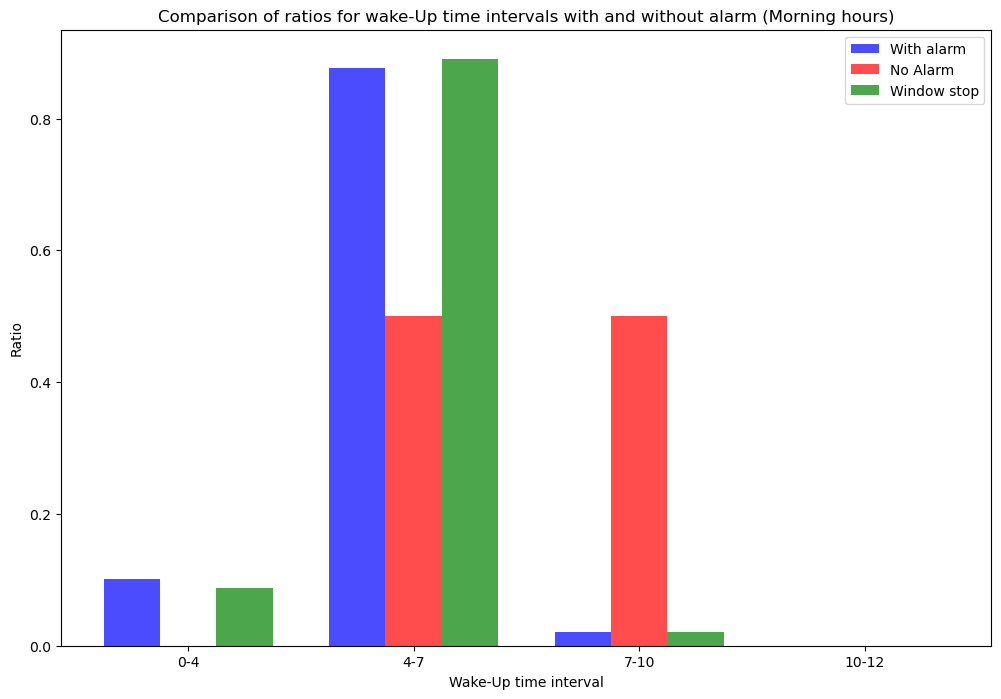

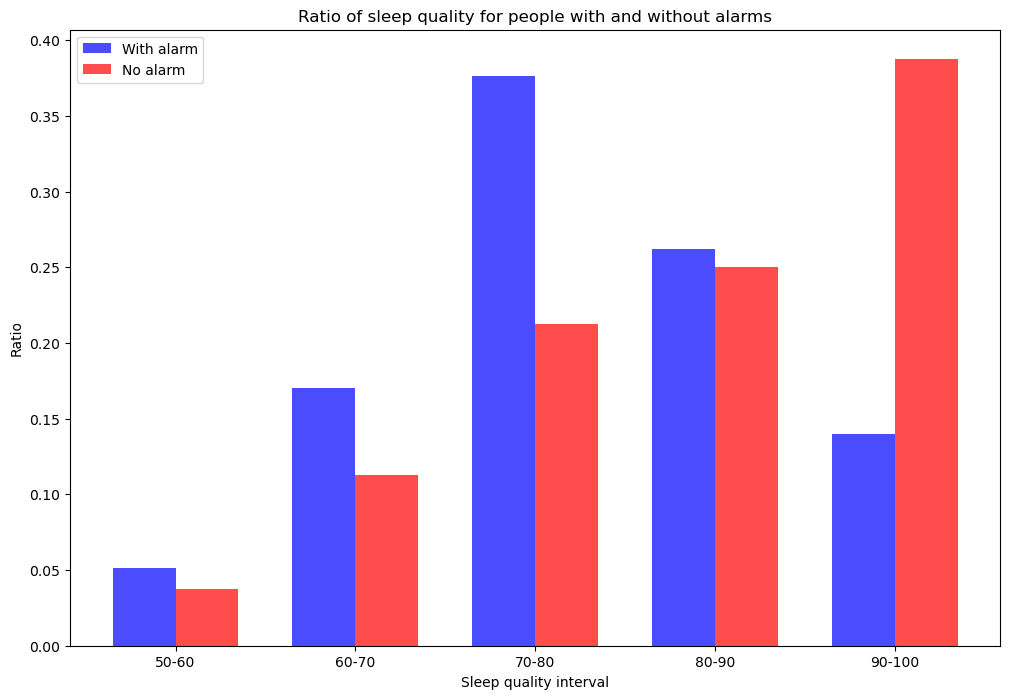

In [6]:
# Plotting
plt.figure(figsize=(12, 8))

# Grouped bar plot for count ratios with and without alarm, and window stop
bar_width = 0.25
bar_positions = range(len(count_ratio_alarm.index))


plt.bar(bar_positions, count_ratio_alarm, width=bar_width, color='blue', alpha=0.7, label='With alarm')
plt.bar([pos + bar_width for pos in bar_positions], count_ratio_no_alarm, width=bar_width, color='red', alpha=0.7, label='No Alarm')
plt.bar([pos + 2 * bar_width for pos in bar_positions], count_ratio_window, width=bar_width, color='green', alpha=0.7, label='Window stop')

plt.title('Comparison of ratios for wake-Up time intervals with and without alarm (Morning hours)')
plt.xlabel('Wake-Up time interval')
plt.ylabel('Ratio')
plt.xticks([pos + bar_width for pos in bar_positions], count_ratio_alarm.index)
plt.legend()
plt.show()

# Plotting
bar_width = 0.35
index = np.arange(len(interval_labels))

plt.figure(figsize=(12, 8))

plt.bar(index - bar_width/2, ratio_alarm, width=bar_width, color='blue', alpha=0.7, label='With alarm')
plt.bar(index + bar_width/2, ratio_no_alarm, width=bar_width, color='red', alpha=0.7, label='No alarm')

# Formatting
plt.title('Ratio of sleep quality for people with and without alarms')
plt.xlabel('Sleep quality interval')
plt.ylabel('Ratio')
plt.xticks(index, interval_labels)
plt.legend()
plt.show()

## Step 3: Give observations

- In the first plot:
      - We can see that the ratio of wake-up intervals with alarm and window stop are nearly the same.This similarity may indicate a correlation or coordinated pattern between the use of alarms and the designated time to conclude the wake-up process.
      - The ratio of wake-up intervals without alarm are higher than the rest in 7 A.M - 10 A.M which means alarm does affect to wake-up time of people clearly. When people don't set alarms, there is a higher likelihood of waking up early than setting alarm.
- In the second plot:
      - We can see that the ratio of sleep quality intervals with alarm are gather around 70%-80% and 80%-90% while without alarm mostly gather around 80%-90% and 90%-100% which means sleep without setting alarm tend to have better quality than set alarm.

- Conclusion:The decision to set an alarm or not depends on individual preferences, lifestyle, and the desired sleep-wake routine. Here are some considerations based on the observations
    - Considerations for Setting an Alarm: 
        - If having a consistent wake-up time is crucial for your daily routine, setting an alarm can help you achieve this goal.
        - If you have work, appointments, or other commitments that require you to wake up at a specific time, using an alarm ensures you stay on schedule.
    - Considerations for Not Setting an Alarm:
        - If you need some relax after working days, then you can consider wake up without an alarm to reduce stress and have a comfortable day.
        - As observed, intervals without alarms showed higher ratios in the 80%-90% and 90%-100% sleep quality ranges, suggesting a potential positive impact on sleep quality.